## Distribuições com distfit

Documentação:
- https://erdogant.github.io/distfit/pages/html/index.html
- https://blog.devgenius.io/how-to-use-distfit-package-in-python-b5a7b18c5d6c

In [1]:
import pandas as pd
from distfit import distfit as dft
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cc_general.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
dt = dft(n_jobs=-1)
dt.fit_transform(df['BALANCE'].values)

[08-06-2025 18:37:57] [distfit.distfit] [INFO] fit
[08-06-2025 18:37:57] [distfit.distfit] [INFO] transform
[08-06-2025 18:37:59] [distfit.distfit] [INFO] [norm      ] [0.21 sec] [RSS: 2.1844e-06] [loc=1564.475 scale=2081.416]
[08-06-2025 18:37:59] [distfit.distfit] [INFO] [expon     ] [0.22 sec] [RSS: 1.02959e-06] [loc=0.000 scale=1564.475]
[08-06-2025 18:37:59] [distfit.distfit] [INFO] [pareto    ] [0.21 sec] [RSS: 5.03428e-07] [loc=-1368.566 scale=1368.566]
[08-06-2025 18:37:59] [distfit.distfit] [INFO] [dweibull  ] [0.21 sec] [RSS: 1.92935e-06] [loc=803.033 scale=1268.599]
[08-06-2025 18:37:59] [distfit.distfit] [INFO] [t         ] [0.23 sec] [RSS: 1.74434e-06] [loc=728.980 scale=822.611]
[08-06-2025 18:37:59] [distfit.distfit] [INFO] [genextreme] [0.22 sec] [RSS: 1.09123e-06] [loc=3.008 scale=12.664]
[08-06-2025 18:37:59] [distfit.distfit] [INFO] [gamma     ] [0.22 sec] [RSS: 3.39202e-07] [loc=-0.000 scale=2999.099]
[08-06-2025 18:37:59] [distfit.distfit] [INFO] [lognorm   ] [0.22

{'model': {'name': 'beta',
  'score': 3.081875855396061e-07,
  'loc': -2.1018397437757165e-20,
  'scale': 949137.3860602186,
  'arg': (np.float64(0.633213492952942), np.float64(615.1946127421506)),
  'params': (np.float64(0.633213492952942),
   np.float64(615.1946127421506),
   np.float64(-2.1018397437757165e-20),
   np.float64(949137.3860602186)),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x151bf6c50>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': np.float64(11.527961412201936),
  'CII_max_alpha': np.float64(3442.51665087081)},
 'summary':           name     score            loc          scale  \
 0         beta       0.0           -0.0   949137.38606   
 1        gamma       0.0           -0.0     2999.09873   
 2       pareto  0.000001   -1368.566333    1368.566333   
 3        expon  0.000001            0.0    1564.474828   
 4   genextreme  0.000001       3.007866      12.663998   
 5            t  0.000002  

[08-06-2025 18:38:35] [distfit.distfit] [INFO] Create pdf plot for the parametric method.
[08-06-2025 18:38:35] [distfit.distfit] [INFO] Estimated distribution: Beta(loc:-0.000000, scale:949137.386060)


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': '\nbeta(a=0.633213, b=615.195, loc=-2.10184e-20, scale=949137)'}, xlabel='Values', ylabel='Frequency'>)

<Figure size 1000x500 with 0 Axes>

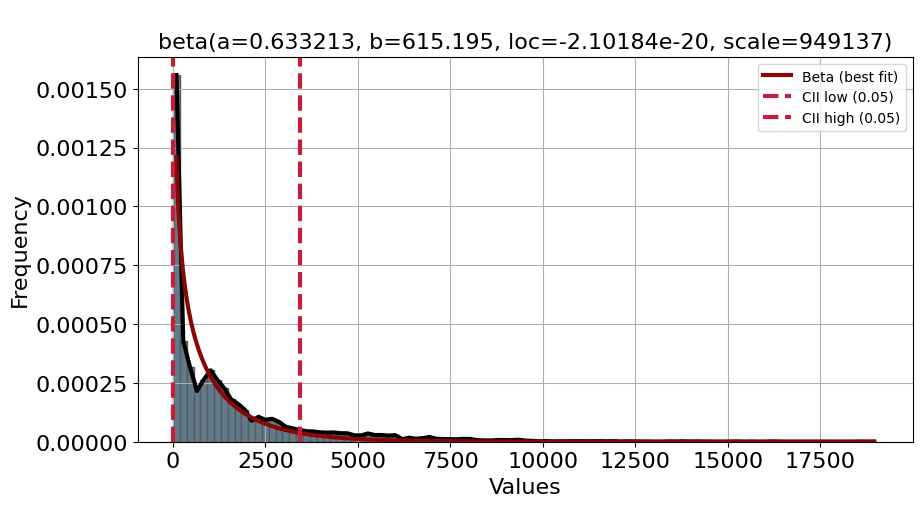

In [ ]:
dt.plot(figsize=(10, 5))

[08-06-2025 18:25:31] [distfit.distfit] [INFO] fit
[08-06-2025 18:25:31] [distfit.distfit] [INFO] transform
[08-06-2025 18:25:31] [distfit.distfit] [INFO] [norm      ] [0.25 sec] [RSS: 4150.14] [loc=0.877 scale=0.237]
[08-06-2025 18:25:31] [distfit.distfit] [INFO] [expon     ] [0.24 sec] [RSS: 4278.37] [loc=0.000 scale=0.877]
[08-06-2025 18:25:31] [distfit.distfit] [INFO] [pareto    ] [0.24 sec] [RSS: 4278.37] [loc=-134217728.000 scale=134217728.000]
[08-06-2025 18:25:31] [distfit.distfit] [INFO] [dweibull  ] [0.24 sec] [RSS: 3564.3] [loc=1.000 scale=0.274]
[08-06-2025 18:25:31] [distfit.distfit] [INFO] [t         ] [0.24 sec] [RSS: 4300.75] [loc=1.000 scale=0.000]
[08-06-2025 18:25:31] [distfit.distfit] [INFO] [genextreme] [0.24 sec] [RSS: 2425.47] [loc=0.956 scale=0.051]
[08-06-2025 18:25:31] [distfit.distfit] [INFO] [gamma     ] [0.24 sec] [RSS: 4161.28] [loc=-4.126 scale=0.012]
[08-06-2025 18:25:31] [distfit.distfit] [INFO] [lognorm   ] [0.24 sec] [RSS: 4311.06] [loc=-0.000 scale=0

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\ngenextreme(c=1.14799, loc=0.955737, scale=0.0508129)'}, xlabel='Values', ylabel='Frequency'>)

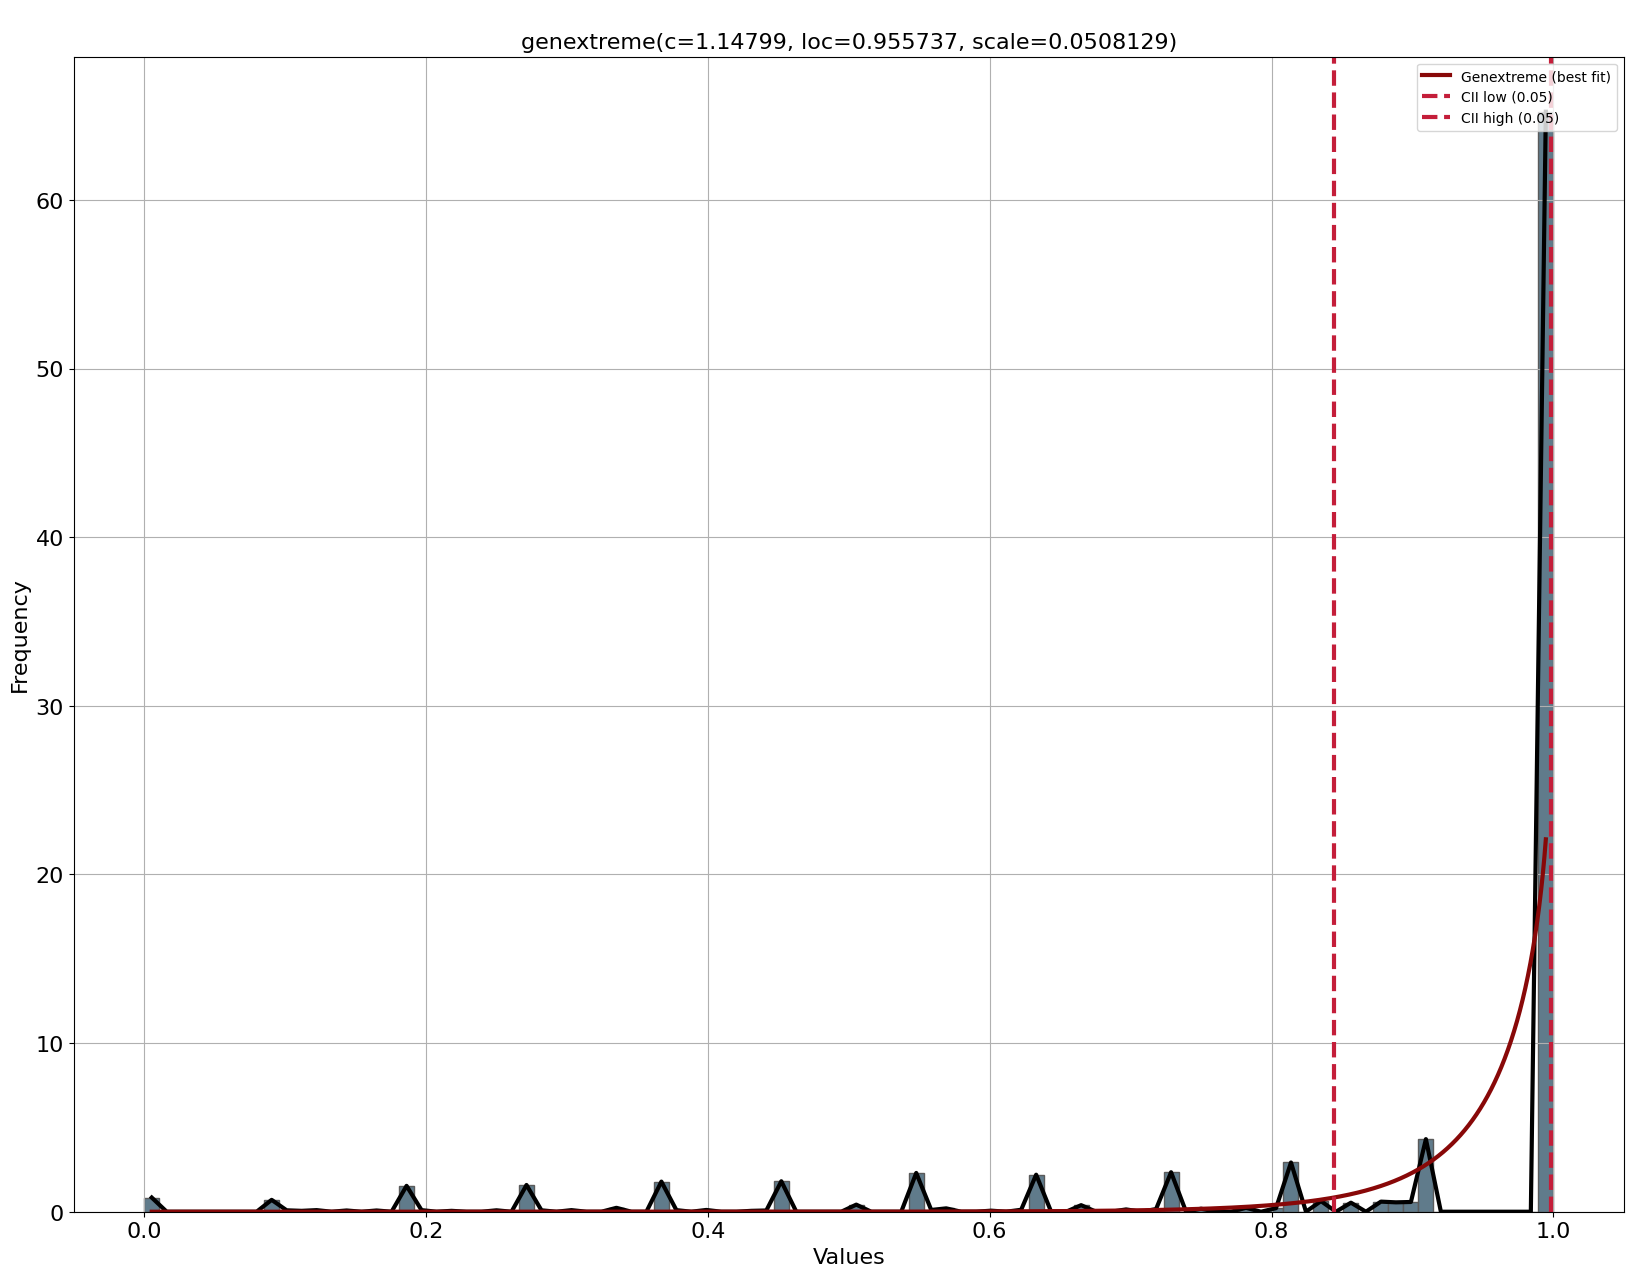

In [10]:
dt = dft(n_jobs=-1)
dt.fit_transform(df['BALANCE_FREQUENCY'].values)
# dt.predict(df['BALANCE_FREQUENCY'].values)
dt.plot()

[08-06-2025 18:29:48] [distfit.distfit] [INFO] fit
[08-06-2025 18:29:48] [distfit.distfit] [INFO] transform
[08-06-2025 18:29:48] [distfit.distfit] [INFO] Fit using binomial distribution.
[08-06-2025 18:29:48] [distfit.distfit] [INFO] [distfit] >[binomial] [RSS=0.278] [n=2] [p=0.162873] [chi^2=0.000778]
[08-06-2025 18:29:48] [distfit.distfit] [INFO] Compute confidence intervals [discrete]
[08-06-2025 18:29:48] [distfit.distfit] [INFO] Create pdf plot for the discrete method.


(<Figure size 2000x1500 with 2 Axes>,
 array([<Axes: title={'center': '\nBinom\nn=2, p=0.162873'}, xlabel='Values', ylabel='Frequency'>,
        <Axes: xlabel='n', ylabel='RSS'>], dtype=object))

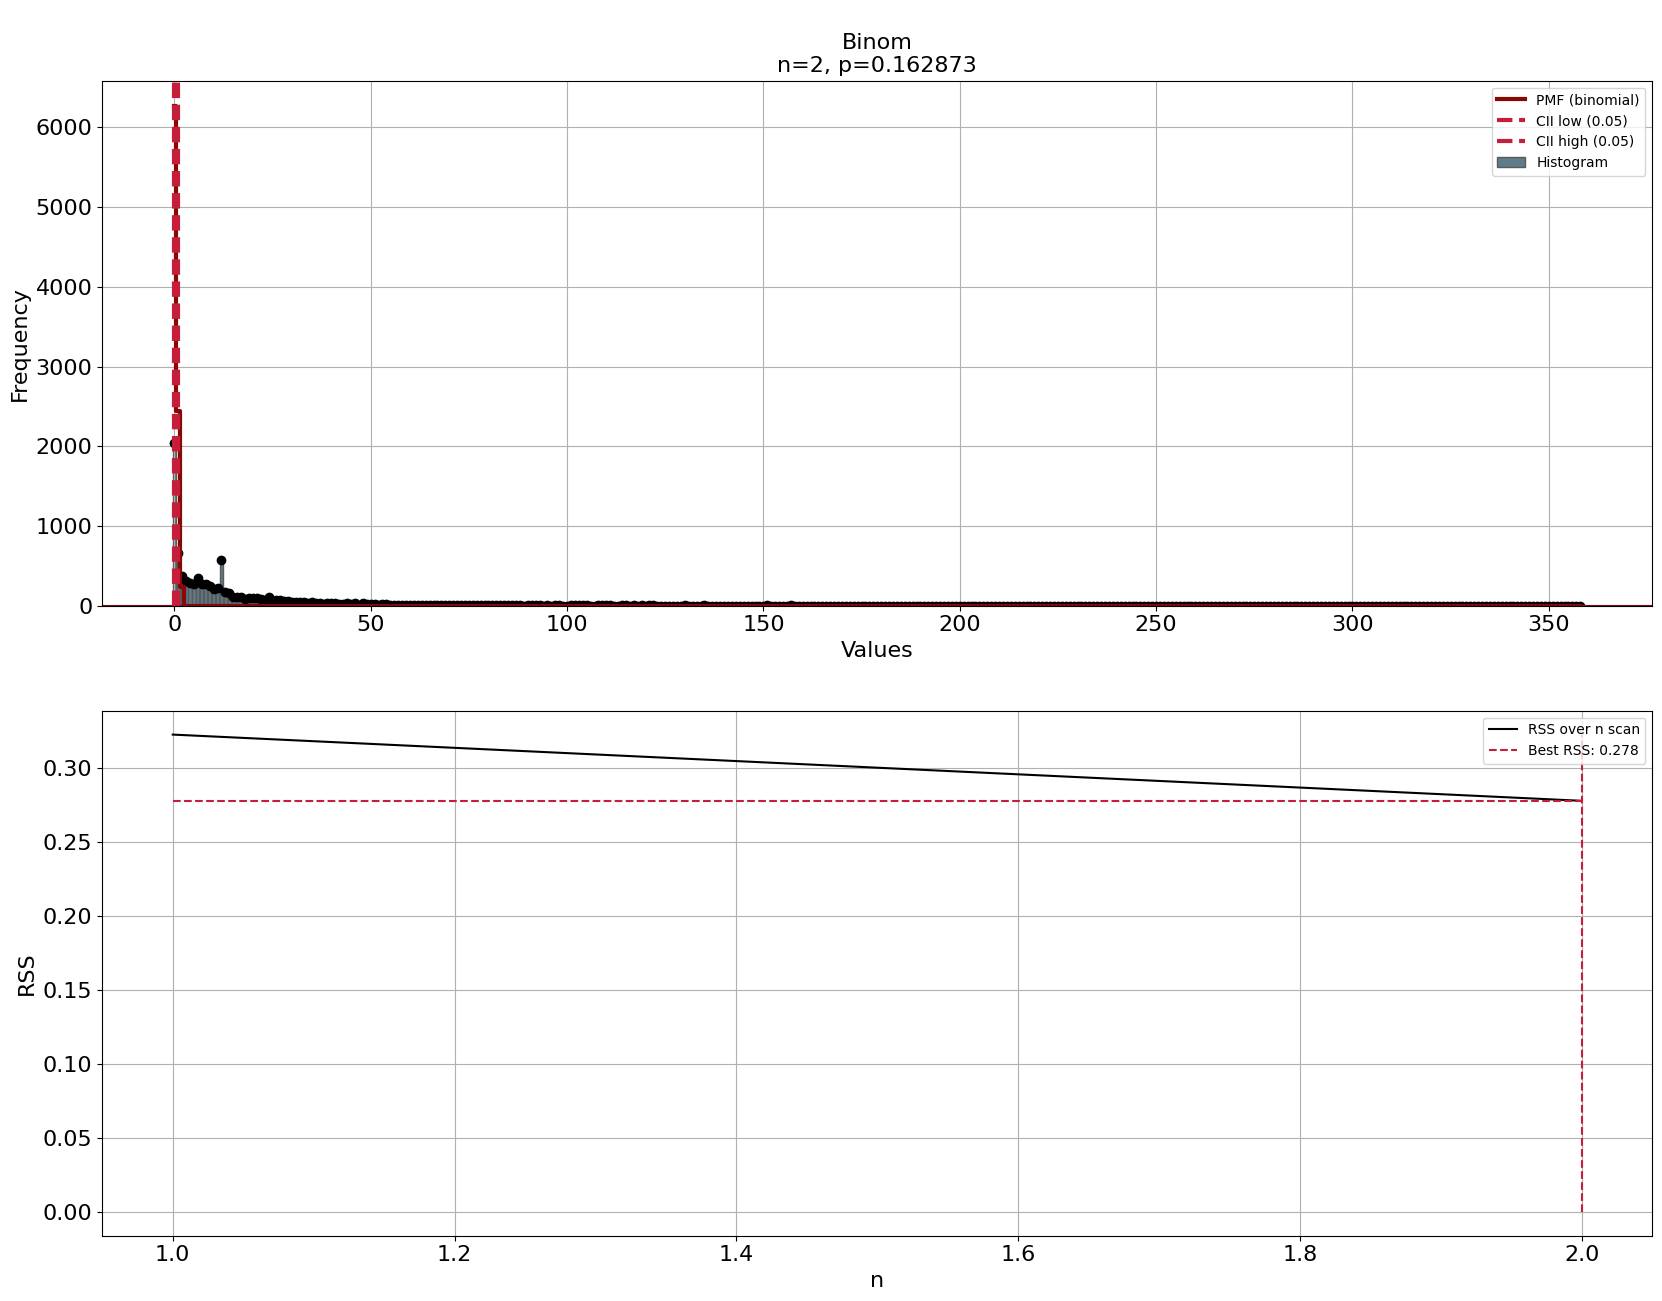

In [14]:
dt = dft(method='discrete', n_jobs=-1)
dt.fit_transform(df['PURCHASES_TRX'].values)
dt.plot()

[08-06-2025 18:33:53] [distfit.distfit] [INFO] fit
[08-06-2025 18:33:53] [distfit.distfit] [INFO] transform
[08-06-2025 18:33:53] [distfit.distfit] [INFO] Compute confidence intervals [quantile]
[08-06-2025 18:33:53] [distfit.distfit] [INFO] Create pdf plot for the quantile method.


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: xlabel='Values', ylabel='Frequency'>)

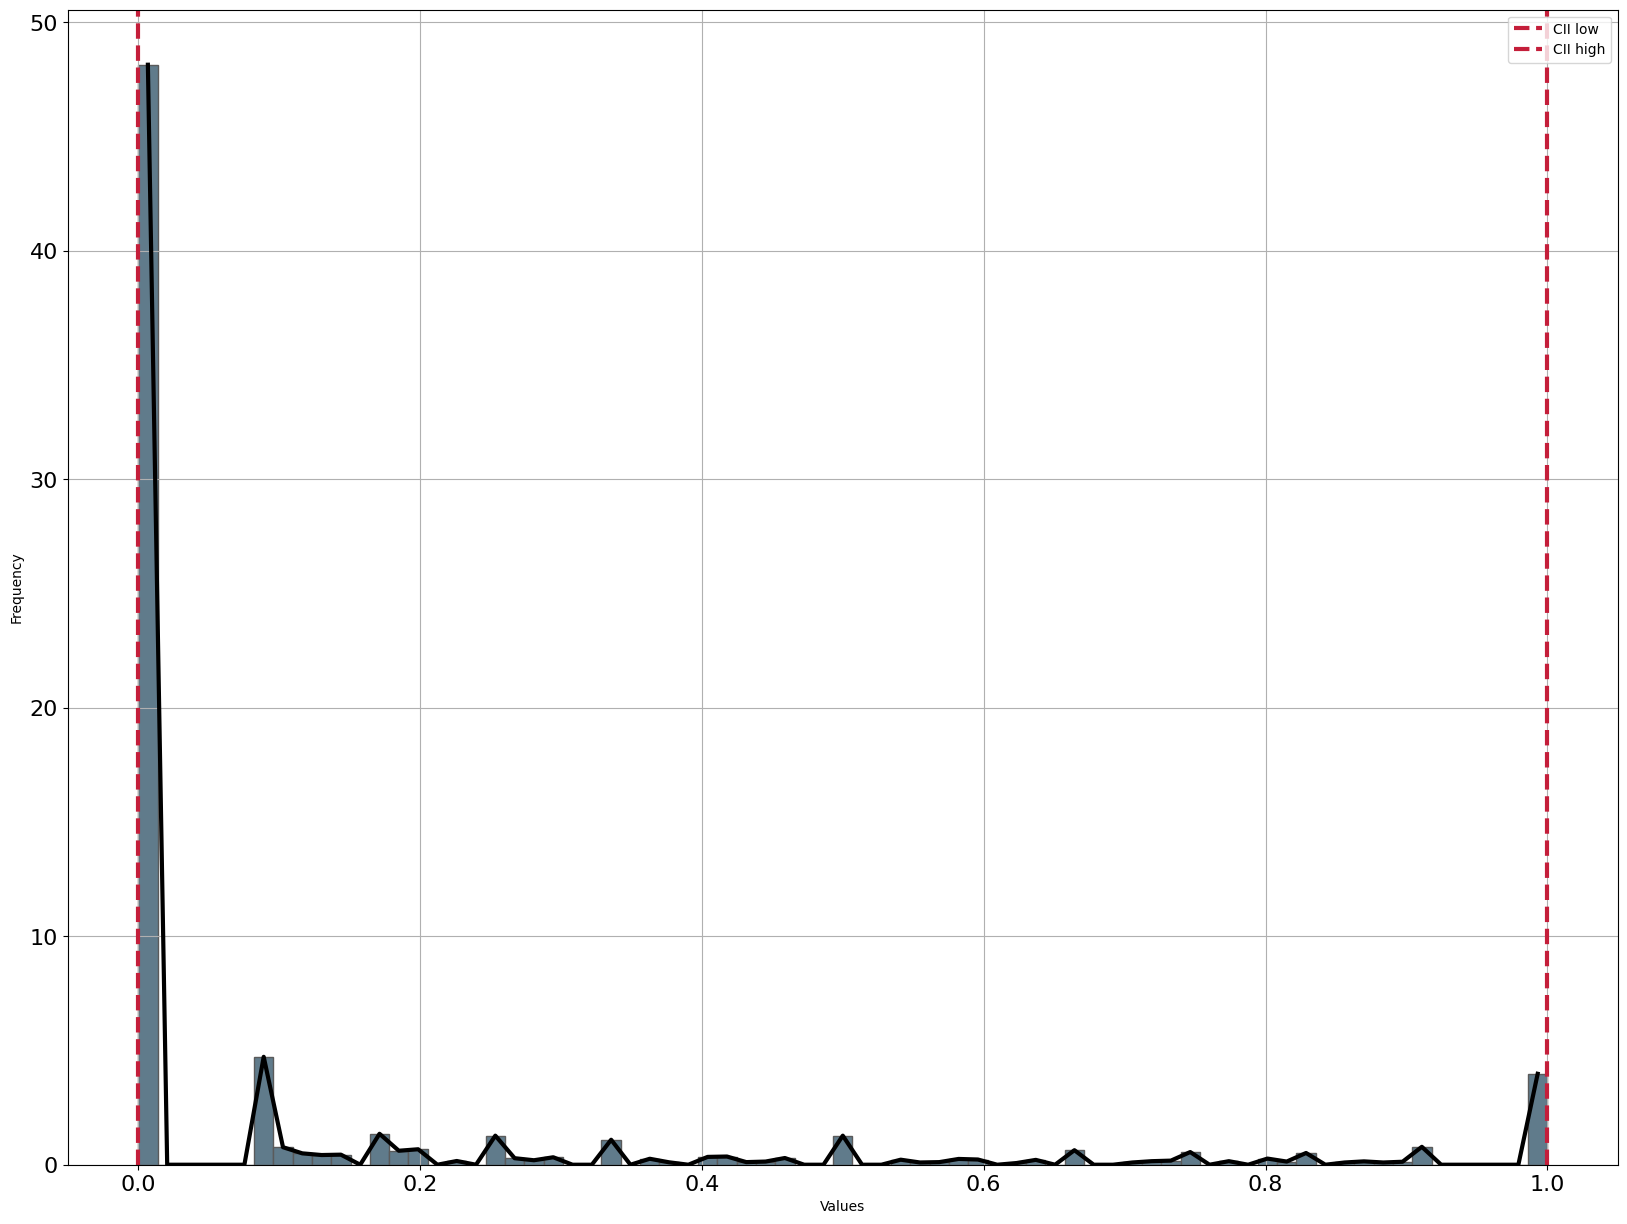

In [19]:

dt = dft(method='quantile', n_jobs=-1)
dt.fit_transform(df['PRC_FULL_PAYMENT'].values)
dt.plot()

[08-06-2025 18:35:32] [distfit.distfit] [INFO] fit
[08-06-2025 18:35:32] [distfit.distfit] [INFO] transform
[08-06-2025 18:35:32] [distfit.distfit] [INFO] Fit using binomial distribution.
[08-06-2025 18:35:32] [distfit.distfit] [INFO] [distfit] >[binomial] [RSS=0.0133] [n=12] [p=0.99582] [chi^2=0.0012]
[08-06-2025 18:35:32] [distfit.distfit] [INFO] Compute confidence intervals [discrete]
[08-06-2025 18:35:32] [distfit.distfit] [INFO] Create pdf plot for the discrete method.


(<Figure size 2000x1500 with 2 Axes>,
 array([<Axes: title={'center': '\nBinom\nn=12, p=0.99582'}, xlabel='Values', ylabel='Frequency'>,
        <Axes: xlabel='n', ylabel='RSS'>], dtype=object))

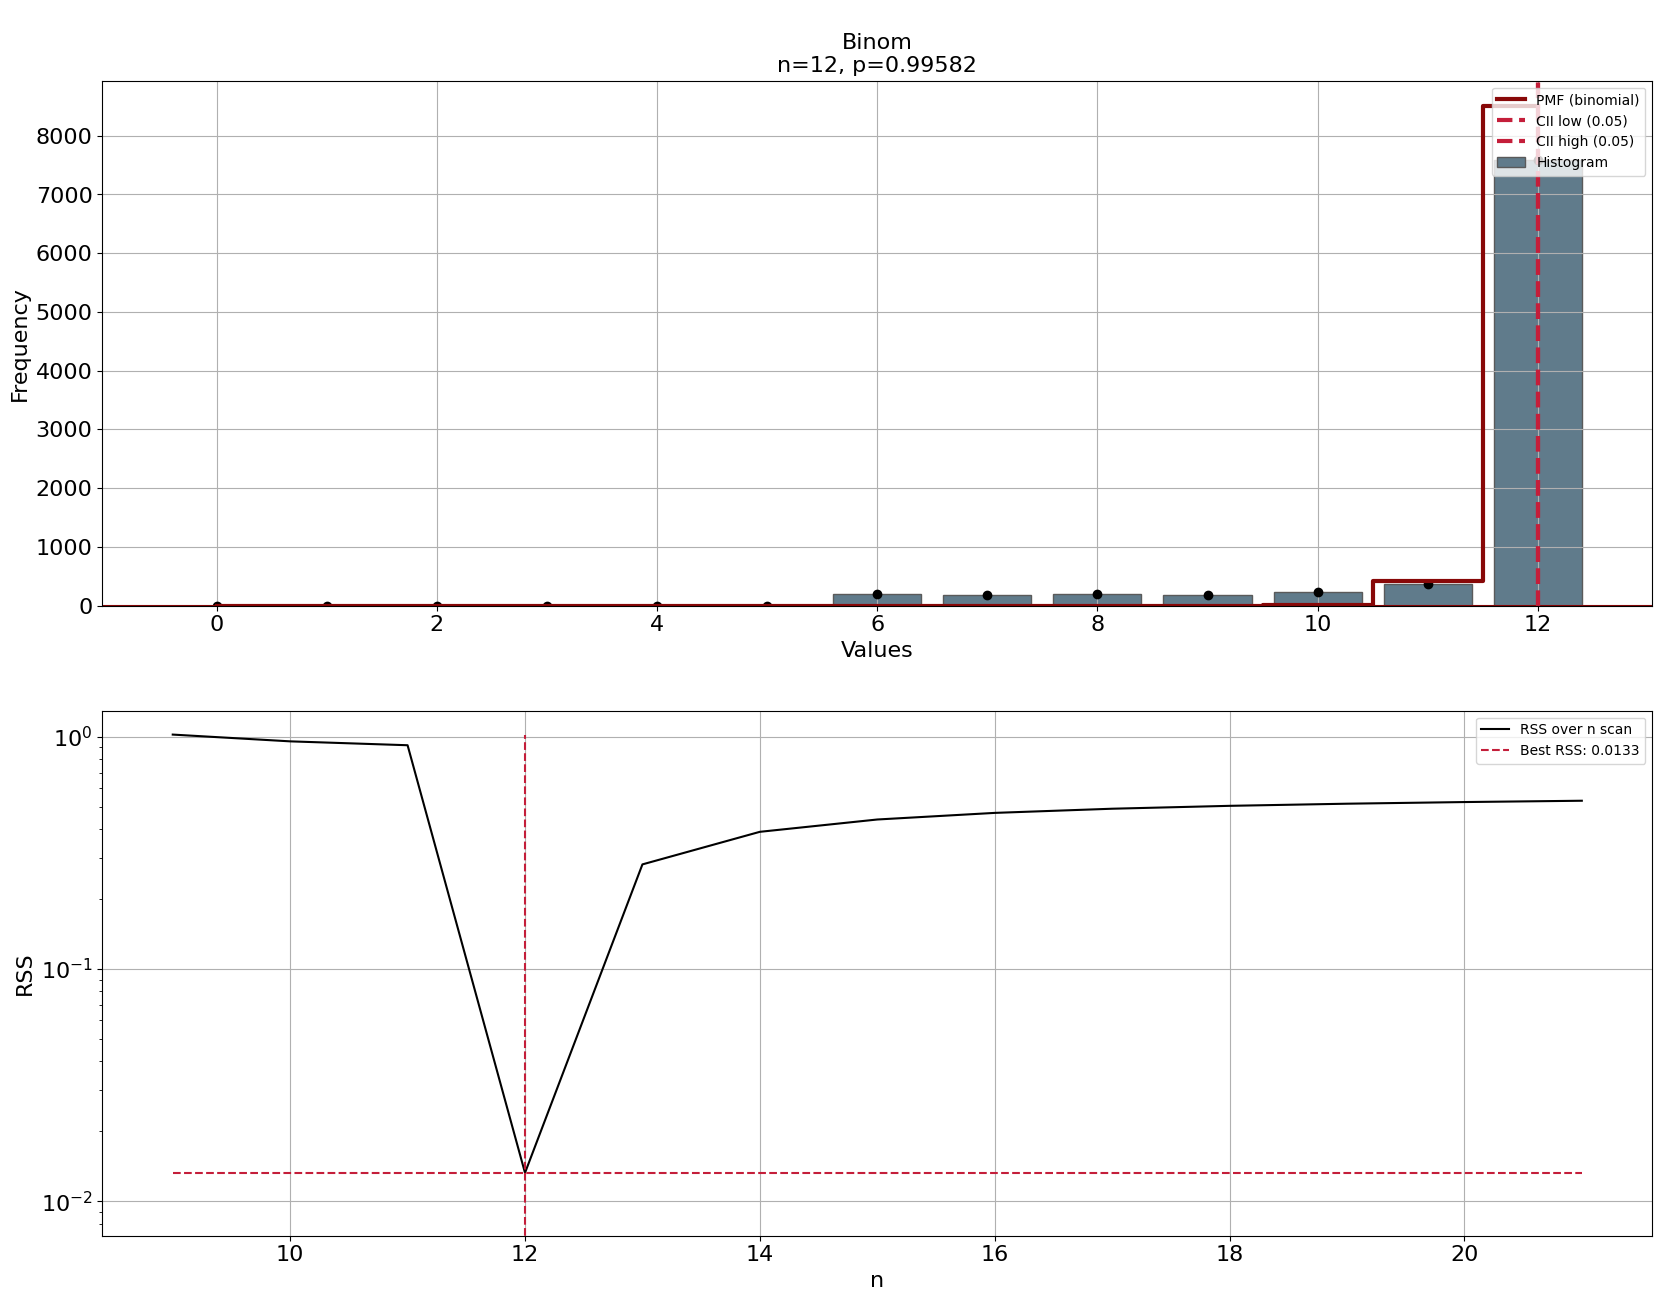

In [22]:
dt = dft(method='discrete', n_jobs=-1)
dt.fit_transform(df['TENURE'].values)
dt.plot()